
<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio de Sistemas de Recomendación

## Objetivos del Laboratorio

1.	Implementar y comparar diferentes tipos de sistemas de recomendación utilizando datos reales.

2.	Explorar el impacto de las características de los datos en la calidad de las recomendaciones.

3.	Desarrollar habilidades en preprocesamiento, modelado y evaluación de sistemas de recomendación.


## Los problemas

A lo largo de este laboratorio deberás enfrentarte a distintos casos prácticos:

- **Caso 1: Sistema de Recomendación Basado en Contenido**

	Debes construir un sistema que recomiende videojuegos similares basándose en su descripción y géneros. Para eso deberás:

	- Preprocesar las descripciones de los juegos (texto) utilizando técnicas de NLP aprendidas durante la clase.

	- Extraer y limpiar las etiquetas de género para su uso en el sistema de recomendación.

	- Implementar una métrica de similitud (como el coseno) para recomendar juegos similares.

	- Evaluar las recomendaciones generadas para un conjunto de juegos específicos.

- **Caso 2: Sistema de Recomendación Basado en Popularidad**

	Debes un sistema que recomiende los juegos más populares según su calificación general y número de reseñas. Para eso deberás:
	
	- Limpiar y convertir las columnas relacionadas con las calificaciones y las reseñas en datos numéricos.
	
	- Identificar los juegos más populares utilizando métricas como la mediana de calificaciones ponderadas.
	
	- Crear una tabla de recomendaciones generales para diferentes géneros.

## Los Datos


- **1. games_description.csv**: Este archivo contiene información detallada sobre videojuegos disponibles en una tienda. Las columnas que tenemos son: 


	- **`name`**: Nombre del videojuego.

	- **`short_description`**: Breve descripción del videojuego.

	- **`long_description`**: Descripción completa y detallada del videojuego.

	- **`genres`**: Lista de géneros asociados al videojuego (por ejemplo, Acción, RPG).

	- **`minimum_system_requirement`**: Requisitos mínimos para ejecutar el videojuego.

	- **`recommend_system_requirement`**: Requisitos recomendados para ejecutar el videojuego.

	- **`release_date`**: Fecha de lanzamiento del videojuego.

	- **`developer`**: Nombre del desarrollador del videojuego.

	- **`publisher`**: Nombre del publicador del videojuego.

	- **`overall_player_rating`**: Calificación general de los jugadores (categórica).

	- **`number_of_reviews_from_purchased_people`**: Número de reseñas realizadas por personas que compraron el juego.

	- **`number_of_english_reviews`**: Número de reseñas en inglés.

	- **`link`**: Enlace al videojuego en la tienda.


- **2. games_ranking.csv**: Este archivo contiene información sobre el ranking de videojuegos basados en diferentes métricas. Las columnsa que tenemos son:


	- **`game_name`**: Nombre del videojuego.

	- **`genre`**: Género principal del videojuego.

	- **`rank_type`**: Tipo de ranking (por ejemplo, ventas, popularidad).

	- **`rank`**: Posición del videojuego en el ranking correspondiente.

----

- Los datos del archivo `games_description.csv` pueden utilizarse para construir sistemas de recomendación basados en contenido.
- Los datos del archivo `games_ranking.csv` son ideales para implementar sistemas basados en popularidad.


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Caso 1

In [27]:
df_descripcion = pd.read_csv("datos/games_description.csv")
df_descripcion

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...
1,Counter-Strike 2,"For over two decades, Counter-Strike has offer...",About This Game\n\t\t\t\t\t\t\tFor over two de...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","['OS: Windows® 10', 'Processor: 4 hardware CPU...","21 Aug, 2012",['Valve'],['Valve'],Very Positive,"(8,313,603)","2,258,990",https://store.steampowered.com/app/730/Counter...
2,"Warhammer 40,000: Space Marine 2",Embody the superhuman skill and brutality of a...,About This Game\nEmbody the superhuman skill a...,"['Warhammer 40K', 'Action', 'Third-Person Shoo...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"9 Sep, 2024",['Saber Interactive'],['Focus Entertainment'],Very Positive,"(81% of 62,791) All Time","51,920",https://store.steampowered.com/app/2183900/War...
3,Cyberpunk 2077,"Cyberpunk 2077 is an open-world, action-advent...",About This Game\nCyberpunk 2077 is an open-wor...,"['Cyberpunk', 'Open World', 'Nudity', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"10 Dec, 2020",['CD PROJEKT RED'],['CD PROJEKT RED'],Very Positive,"(680,264)","324,124",https://store.steampowered.com/app/1091500/Cyb...
4,ELDEN RING,THE CRITICALLY ACCLAIMED FANTASY ACTION RPG. R...,About This Game\nTHE CRITICALLY ACCLAIMED FANT...,"['Souls-like', 'Dark Fantasy', 'Open World', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"25 Feb, 2022","['FromSoftware, Inc.']","['FromSoftware, Inc.', 'Bandai Namco Entertain...",Very Positive,"(705,261)","491,741",https://store.steampowered.com/app/1245620/ELD...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,MXGP PRO,Adjust your bike's configuration like a mechan...,About This Game\n\t\t\t\t\t\t\tThe official vi...,"['Simulation', 'Racing', 'Sports', 'Motocross'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"29 Jun, 2018",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,(777),433,https://store.steampowered.com/app/798290/MXGP...
286,MXGP 2019 - The Official Motocross Videogame,Experience the excitement of the 2019 season f...,About This Game\n\t\t\t\t\t\t\tThe official Mo...,"['Simulation', 'Racing', 'Sports', 'Motorbike'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"27 Aug, 2019",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,(90% of 858) All Time,446,https://store.steampowered.com/app/1018160/MXG...
287,Ride 2,The fastest and most iconic bikes in the world...,About This Game\n\t\t\t\t\t\t\tWelcome to the ...,"['Racing', 'Sports', 'Simulation', 'Motorbike'...",['OS *: Windows® 7 SP1 / Windows® 8 / Windows®...,['OS *: Windows® 7 SP1 64-Bit / Windows® 8 64-...,"7 Oct, 2016",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,"(86% of 2,335) All Time","1,045",https://store.steampowered.com/app/477770/Ride...
288,Tanuki Sunset,Master the longboard as you drift through stun...,About This Game\nGrab Your Longboard and Race ...,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","['OS *: Windows 7 (32-bit)', 'Processor: Dual ...","4 Dec, 2020",['Rewind Games'],['Rewind Games'],Very Posit

In [28]:
# df["genres"] = df["genres"].str.replace("'", "").str.replace("[", "").str.replace("]", "")
# df["genres"]

In [29]:
# df["genres"] = df["genres"].str.split(",")
# df["genres"]

- Después de hacer un analisis hemos encontrado patrones en los generos. Cuando encontramos por ejemplo, Action y RPG se crea una nueva categoria que junta las dos

In [30]:
vectorizer = CountVectorizer(max_features=250, stop_words='english')
vectorizer

CountVectorizer(max_features=250, stop_words='english')

In [31]:
x = vectorizer.fit_transform(df_descripcion["genres"]).toarray()
x

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0]])

In [32]:
similarity = cosine_similarity(x)
similarity

array([[1.        , 0.16439899, 0.5062176 , ..., 0.1823843 , 0.2906191 ,
        0.16979054],
       [0.16439899, 1.        , 0.38490018, ..., 0.11094004, 0.07071068,
        0.15491933],
       [0.5062176 , 0.38490018, 1.        , ..., 0.21350421, 0.27216553,
        0.2981424 ],
       ...,
       [0.1823843 , 0.11094004, 0.21350421, ..., 1.        , 0.2941742 ,
        0.50128041],
       [0.2906191 , 0.07071068, 0.27216553, ..., 0.2941742 , 1.        ,
        0.45643546],
       [0.16979054, 0.15491933, 0.2981424 , ..., 0.50128041, 0.45643546,
        1.        ]])

In [33]:
def get_index_from_name(name):
    return df_descripcion[df_descripcion.name == name].index[0]

def get_name_from_index(index):
    return df_descripcion[df_descripcion.index == index]["name"].values[0]

In [34]:
user_like_game = "ELDEN RING"

In [35]:
mov_index = get_index_from_name(user_like_game)
mov_index

np.int64(4)

In [36]:
similarity[mov_index]

array([0.63019612, 0.36666667, 0.41697519, 0.54772256, 1.        ,
       0.36623351, 0.28347335, 0.58925565, 0.41328414, 0.42700841,
       0.54772256, 0.45732956, 0.27854301, 0.48291214, 0.46579713,
       0.38490018, 0.41247896, 0.34020691, 0.35176324, 0.36623351,
       0.4061812 , 0.5       , 0.50832857, 0.4061812 , 0.45643546,
       0.34815531, 0.55566238, 0.40946151, 0.46666667, 0.59160798,
       0.20851441, 0.50395263, 0.39440532, 0.35147975, 0.23947374,
       0.74316054, 0.62882815, 0.6479516 , 0.17817416, 0.33471934,
       0.27854301, 0.52059679, 0.36514837, 0.5       , 0.43328912,
       0.43207928, 0.45074894, 0.33333333, 0.24333213, 0.33333333,
       0.26688026, 0.63333333, 0.40946151, 0.40032038, 0.40201513,
       0.46666667, 0.34044145, 0.27854301, 0.41099747, 0.3       ,
       0.54307885, 0.37851665, 0.46420708, 0.38490018, 0.74835543,
       0.28426762, 0.35355339, 0.26352314, 0.25      , 0.21004201,
       0.4383973 , 0.24759378, 0.25458754, 0.57166195, 0.58925

In [37]:
simillar_mov = list(enumerate(similarity[mov_index]))
simillar_mov

[(0, np.float64(0.6301961180038695)),
 (1, np.float64(0.36666666666666664)),
 (2, np.float64(0.41697519441472974)),
 (3, np.float64(0.5477225575051661)),
 (4, np.float64(0.9999999999999999)),
 (5, np.float64(0.36623351038235713)),
 (6, np.float64(0.28347335475692037)),
 (7, np.float64(0.5892556509887895)),
 (8, np.float64(0.4132841425773679)),
 (9, np.float64(0.42700841014689905)),
 (10, np.float64(0.5477225575051661)),
 (11, np.float64(0.4573295603800236)),
 (12, np.float64(0.2785430072655778)),
 (13, np.float64(0.48291213938658145)),
 (14, np.float64(0.4657971306985123)),
 (15, np.float64(0.3849001794597505)),
 (16, np.float64(0.4124789556921526)),
 (17, np.float64(0.3402069087198859)),
 (18, np.float64(0.3517632353407241)),
 (19, np.float64(0.36623351038235713)),
 (20, np.float64(0.40618119722996154)),
 (21, np.float64(0.49999999999999994)),
 (22, np.float64(0.5083285677753488)),
 (23, np.float64(0.40618119722996154)),
 (24, np.float64(0.45643546458763834)),
 (25, np.float64(0.34815

In [38]:
sorted_mov = sorted(simillar_mov, key=lambda x: x[1], reverse=True)
sorted_mov

[(4, np.float64(0.9999999999999999)),
 (113, np.float64(0.7606388292556648)),
 (64, np.float64(0.7483554251115621)),
 (35, np.float64(0.743160535617538)),
 (114, np.float64(0.6488856845230503)),
 (37, np.float64(0.6479515952918626)),
 (51, np.float64(0.6333333333333333)),
 (0, np.float64(0.6301961180038695)),
 (36, np.float64(0.6288281455225323)),
 (101, np.float64(0.60279628678631)),
 (29, np.float64(0.5916079783099615)),
 (7, np.float64(0.5892556509887895)),
 (74, np.float64(0.5892556509887895)),
 (118, np.float64(0.5880352375606642)),
 (73, np.float64(0.5716619504750293)),
 (79, np.float64(0.5687501230847871)),
 (26, np.float64(0.5556623828915214)),
 (3, np.float64(0.5477225575051661)),
 (10, np.float64(0.5477225575051661)),
 (103, np.float64(0.5466081666101212)),
 (60, np.float64(0.5430788529512779)),
 (100, np.float64(0.5388159060803247)),
 (41, np.float64(0.5205967931336315)),
 (233, np.float64(0.5106882308569509)),
 (225, np.float64(0.5088816890758622)),
 (22, np.float64(0.50832

In [39]:
top_games = {}
for i in sorted_mov[1:11]:
    top_games[get_name_from_index(i[0])] = i[1]
top_games

{'DARK SOULS™ III': np.float64(0.7606388292556648),
 'Monster Hunter: World': np.float64(0.7483554251115621),
 'ELDEN RING Shadow of the Erdtree': np.float64(0.743160535617538),
 'Hogwarts Legacy': np.float64(0.6488856845230503),
 'FINAL FANTASY XIV Online': np.float64(0.6479515952918626),
 'Sekiro™: Shadows Die Twice - GOTY Edition': np.float64(0.6333333333333333),
 'Black Myth: Wukong': np.float64(0.6301961180038695),
 'Diablo® IV': np.float64(0.6288281455225323),
 'Path of Exile': np.float64(0.60279628678631),
 'The Witcher 3: Wild Hunt': np.float64(0.5916079783099615)}

C:\Users\ivigo\AppData\Local\Temp\ipykernel_14384\1908491109.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


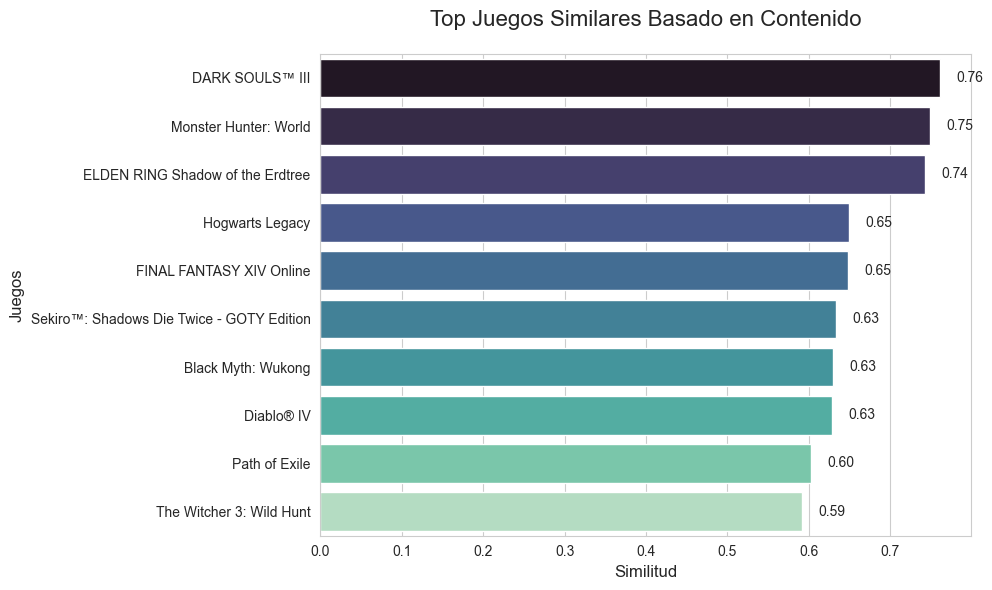

In [40]:
# visualizamos los resultados
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Crear gráfico de barras
sns.barplot(
    x=list(top_games.values()), 
    y=list(top_games.keys()), 
    palette="mako"
)

# Añadir etiquetas y título
plt.title("Top Juegos Similares Basado en Contenido", fontsize=16, pad=20)
plt.xlabel("Similitud", fontsize=12)
plt.ylabel("Juegos", fontsize=12)

# Añadir valores al final de cada barra
for i, value in enumerate(top_games.values()):
    plt.text(value + 0.02, i, f"{value:.2f}", va='center', fontsize=10)

plt.tight_layout()


# Caso 2

In [41]:
from scipy.spatial.distance import pdist, squareform

In [42]:
df_ranking = pd.read_csv("datos/games_ranking.csv", index_col="game_name")
df_ranking

,genre,rank_type,rank
game_name,,,
Counter-Strike 2,Action,Sales,1
"Warhammer 40,000: Space Marine 2",Action,Sales,2
Cyberpunk 2077,Action,Sales,3
Black Myth: Wukong,Action,Sales,4
ELDEN RING,Action,Sales,5
...,...,...,...
MXGP PRO,Sports & Racing,Review,36
MXGP 2019 - The Official Motocross Videogame,Sports & Racing,Review,37
Ride 2,Sports & Racing,Review,38


In [43]:
pd.set_option("display.max_columns", None)
df_mergeado = pd.merge(df_descripcion, df_ranking, 'inner', left_on="name", right_on="game_name")
df_mergeado

,name,short_description,long_description,genres,minimum_system_requirement,recommend_system_requirement,release_date,developer,publisher,overall_player_rating,number_of_reviews_from_purchased_people,number_of_english_reviews,link,genre,rank_type,rank
0,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...,Action,Sales,4
1,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...,Action,Revenue,2
2,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...,Action,Review,5
3,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...,Adventure,Sales,2
4,Black Myth: Wukong,Black Myth: Wukong is an action RPG rooted in ...,About This Game\n\t\t\t\t\t\t\tBlack Myth: Wuk...,"['Mythology', 'Action RPG', 'Action', 'RPG', '...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"19 Aug, 2024",['Game Science'],['Game Science'],Overwhelmingly Positive,"(654,820)","51,931",https://store.steampowered.com/app/2358720/Bla...,Adventure,Revenue,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,MXGP PRO,Adjust your bike's configuration like a mechan...,About This Game\n\t\t\t\t\t\t\tThe official vi...,"['Simulation', 'Racing', 'Sports', 'Motocross'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"29 Jun, 2018",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,(777),433,https://store.steampowered.com/app/798290/MXGP...,Sports & Racing,Review,36
652,MXGP 2019 - The Official Motocross Videogame,Experience the excitement of the 2019 season f...,About This Game\n\t\t\t\t\t\t\tThe official Mo...,"['Simulation', 'Racing', 'Sports', 'Motorbike'...",['Requires a 64-bit processor and operating sy...,['Requires a 64-bit processor and operating sy...,"27 Aug, 2019",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,(90% of 858) All Time,446,https://store.steampowered.com/app/1018160/MXG...,Sports & Racing,Review,37
653,Ride 2,The fastest and most iconic bikes in the world...,About This Game\n\t\t\t\t\t\t\tWelcome to the ...,"['Racing', 'Sports', 'Simulation', 'Motorbike'...",['OS *: Windows® 7 SP1 / Windows® 8 / Windows®...,['OS *: Windows® 7 SP1 64-Bit / Windows® 8 64-...,"7 Oct, 2016",['Milestone S.r.l.'],['Milestone S.r.l.'],Very Positive,"(86% of 2,335) All Time","1,045",https://store.steampowered.com/app/477770/Ride...,Sports & Racing,Review,38
654,Tanuki Sunset,Master the longboard as you drift through stun...,About This Game\nGrab Your Longboard and Race ...,"['Racing', 'Action', 'Indie', 'Sports', 'Adven...","

In [44]:
steam_ratings = {
    "Overwhelmingly Positive": 10,
    "Very Positive": 9,
    "Positive": 8,
    "Mostly Positive": 7,
    "Mixed": 6,
    "Mostly Negative": 5,
    "Negative": 4,
    "Very Negative": 3,
    "Extremely Negative": 2,
    "Overwhelmingly Negative": 1
}

In [45]:
df_mergeado['overall_player_rating'] = df_mergeado['overall_player_rating'].map(steam_ratings).fillna(6).astype(int)

In [46]:
df_review = df_mergeado[["name", "genre", "overall_player_rating", "number_of_english_reviews"]]

In [47]:
df_review["number_of_english_reviews"] = df_review["number_of_english_reviews"].str.replace(",", "").astype(int)

C:\Users\ivigo\AppData\Local\Temp\ipykernel_14384\1215276596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["number_of_english_reviews"] = df_review["number_of_english_reviews"].str.replace(",", "").astype(int)


In [48]:
df_review_agrupado = df_review.groupby(["name", "genre"])[["overall_player_rating", "number_of_english_reviews"]].median()
df_review_agrupado.reset_index(inplace=True)
df_review_agrupado

,name,genre,overall_player_rating,number_of_english_reviews
0,69 Balls,Sports & Racing,9.0,120.0
1,7 Days to Die,Simulation,9.0,158982.0
2,ARK: Survival Ascended,Adventure,6.0,36814.0
3,ARK: Survival Evolved,Action,9.0,310038.0
4,Age of Empires II (Retired),Strategy,10.0,43872.0
...,...,...,...,...
387,eFootball™,Simulation,6.0,21184.0
388,eFootball™,Sports & Racing,6.0,21184.0
389,iRacing,Sports & Racing,9.0,2606.0
390,shapez 2,Simulation,10.0,4720.0


In [49]:
df_recomendaciones = df_review_agrupado[df_review_agrupado["genre"] == "Action"]
df_recomendaciones[0:20]

,name,genre,overall_player_rating,number_of_english_reviews
3,ARK: Survival Evolved,Action,9.0,310038.0
17,Among Us,Action,9.0,406705.0
20,Apex Legends™,Action,6.0,406269.0
32,Battlefield™ V,Action,7.0,34879.0
34,Black Desert,Action,7.0,46936.0
37,Black Myth: Wukong,Action,10.0,51931.0
41,Borderlands 2,Action,10.0,159122.0
43,Call of Duty®,Action,6.0,299267.0
44,Call of Duty®: Black Ops II,Action,9.0,21097.0
45,Call of Duty®: Black Ops III,Action,9.0,145713.0


In [50]:
genero = "Action"
calificacion = 9

def por_genero(genre: str):
    df_recomendaciones = df_review_agrupado[df_review_agrupado["genre"] == genre].nlargest(9, "overall_player_rating")
    return df_recomendaciones.sort_values("overall_player_rating", ascending=True)

def por_calificacion(cal: int):
    df_recomendaciones = df_review_agrupado[df_review_agrupado["overall_player_rating"] == cal].nlargest(9, "overall_player_rating")
    return df_recomendaciones.sort_values("overall_player_rating", ascending=True)

def funcion_filtrar(genre = None, calificacion = None):
    df_recomendaciones = None
    if genre is not None:
        df_recomendaciones = df_review_agrupado[df_review_agrupado["genre"] == genre]
    if calificacion is not None:
        df_recomendaciones = df_review_agrupado[df_review_agrupado["overall_player_rating"] == calificacion]
    
    if df_recomendaciones is not None:
        df_recomendaciones.sort_values("overall_player_rating", ascending=True)
    else:
        df_recomendaciones = df_review_agrupado.copy()

    return df_recomendaciones

In [51]:
por_genero(genero)

,name,genre,overall_player_rating,number_of_english_reviews
37,Black Myth: Wukong,Action,10.0,51931.0
41,Borderlands 2,Action,10.0,159122.0
85,Deep Rock Galactic,Action,10.0,187273.0
89,Devil May Cry 5,Action,10.0,39742.0
104,Dying Light,Action,10.0,115682.0
157,Hades,Action,10.0,135792.0
159,Half-Life 2,Action,10.0,91844.0
164,Hollow Knight,Action,10.0,136283.0
175,Left 4 Dead 2,Action,10.0,273964.0


In [52]:
por_calificacion(7)

,name,genre,overall_player_rating,number_of_english_reviews
32,Battlefield™ V,Action,7.0,34879.0
34,Black Desert,Action,7.0,46936.0
35,Black Desert,Adventure,7.0,46936.0
36,Black Desert,Role-Playing,7.0,46936.0
68,Crusader Kings III: Tours & Tournaments,Simulation,7.0,883.0
81,Dark and Darker,Role-Playing,7.0,28740.0
91,Diablo® IV,Action,7.0,11876.0
92,Diablo® IV,Role-Playing,7.0,11876.0
115,ELDEN RING Shadow of the Erdtree,Action,7.0,47928.0


In [ ]:
funcion_filtrar("Action", 10)

,name,genre,overall_player_rating,number_of_english_reviews
99,Downhill Pro Racer,Sports & Racing,8.0,15.0
